<a href="https://colab.research.google.com/github/janaabdulhamid/new_repo/blob/main/regression_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Jana Shady Mohamed Abdulhamid Ahmed

ID: 58-4183

Tutorial: 14

---

Name: Hania Tamer ElGhadban

ID: 58-6787

Tutorial: 14

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


,0
Building_ID,0
Building_Type,110
Governorate,227
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,110


In this step we are trying to understand the dataset provided where we use ***df.info()*** to display the column names, how much data is there as in the non null values, and what is the type of the data in each column. Then we used ***df.isnull().sum()*** to know the the amount of null values in each column.

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
import pandas as pd
import re
import numpy as np
from datetime import datetime

# Clean Neighborhood name
def clean_neighborhood_name(name):
    if isinstance(name, str):
        # Remove special characters and numbers
        name = re.sub(r'[^\w\s]', '', name)  # Remove specials, keep letters, digits, spaces
        name = re.sub(r'\d+', '', name)  # Remove digits
        name = name.strip().lower()
        return name
    return name

df['Neighborhood'] = df['Neighborhood'].apply(clean_neighborhood_name)

# Clean SquareFootage
df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace('m2', '', regex=False).str.strip()
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')

# Clean Energy_Consumption
df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '', regex=False).str.strip()
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')

# Convert Last_Maintenance_Date to datetime
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')

# Handle inconsistencies in Average_Temperature (negative values as invalid)
df['Average_Temperature'] = df['Average_Temperature'].apply(lambda x: np.nan if (pd.notnull(x) and x < 0) else x)

# Resolve null values
# For categorical: mode
for column in ['Building_Type', 'Governorate', 'Neighborhood', 'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level']:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].mode()[0])

# For numerical: median
for column in ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']:
    df[column] = df[column].fillna(df[column].median())

# Standardize Day_of_Week
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize()

# Feature engineer Days_since_last_maintenance
current_date = datetime(2025, 10, 21)
df['Days_since_last_maintenance'] = (pd.to_datetime(current_date) - df['Last_Maintenance_Date']).dt.days
# Handle missing days (if any invalid dates)
df['Days_since_last_maintenance'] = df['Days_since_last_maintenance'].fillna(df['Days_since_last_maintenance'].median())

# Display changes
print('After cleaning:')
display(df.info())
display(df.head())

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Building_ID                  1100 non-null   object        
 1   Building_Type                1100 non-null   object        
 2   Governorate                  1100 non-null   object        
 3   Neighborhood                 1100 non-null   object        
 4   Day_of_Week                  1100 non-null   object        
 5   Occupancy_Level              1100 non-null   object        
 6   Appliances_Usage_Level       1100 non-null   object        
 7   SquareFootage                1100 non-null   int64         
 8   Last_Maintenance_Date        1100 non-null   datetime64[ns]
 9   Average_Temperature          1100 non-null   float64       
 10  Energy_Consumption           1100 non-null   float64       
 11  Days_since_last_maintenance

None

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_since_last_maintenance
0,BLD-1000-UD,Residential,Alexandria,smouha,Wednesday,High,Low,7063,2020-01-01,28.61,2713.95,2120
1,BLD-1001-AX,Commercial,Giza,mohandessin,Tuesday,High,High,44372,2022-02-24,35.60,5744.99,1335
2,BLD-1002-IH,Industrial,Cairo,new cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24,1702
3,BLD-1003-HE,Residential,Alexandria,dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14,814
4,BLD-1004-XD,Commercial,Alexandria,smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17,1166


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

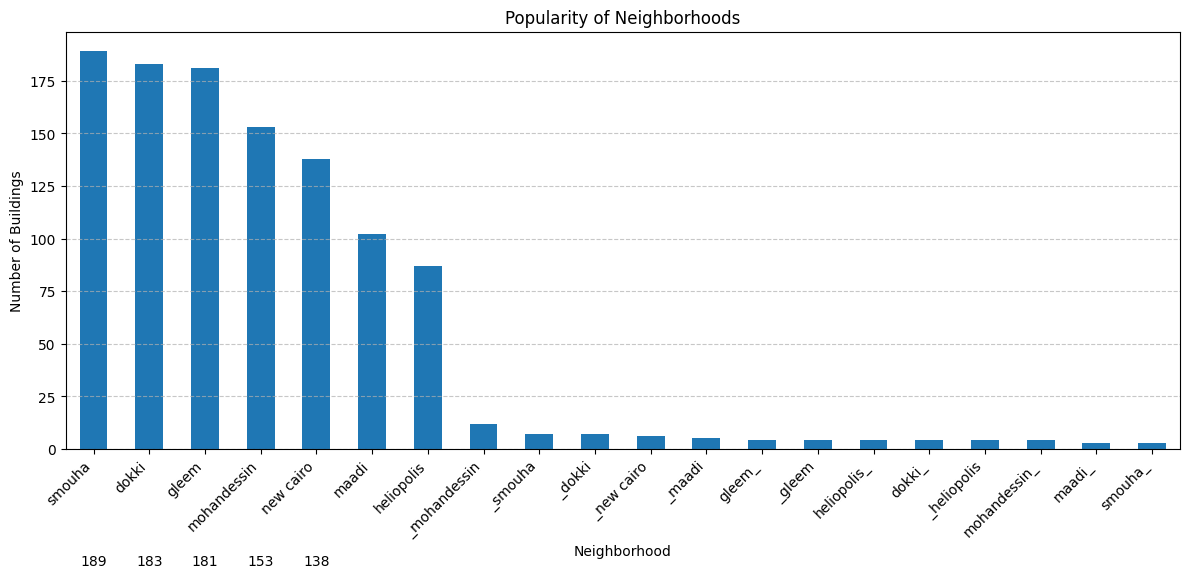

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is the cleaned DataFrame from previous steps
neighborhood_counts = df['Neighborhood'].value_counts()
plt.figure(figsize=(12, 6))
ax = neighborhood_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Popularity of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=45, ha='right') # Adjust rotation and horizontal alignment for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels for the counts below the bars for the top neighborhoods
# Let's add labels for the top 5 neighborhoods
top_n = 5
for i, (neighborhood, count) in enumerate(neighborhood_counts.sort_values(ascending=False).head(top_n).items()):
    # Find the x-position of the bar for the current neighborhood
    x_pos = ax.patches[i].get_x() + ax.patches[i].get_width() / 2.
    # Add the text label slightly below the x-axis
    ax.text(x_pos, -50, str(count), ha='center', va='top', color='black', fontsize=10, rotation=0) # Adjust y-position (-50) as needed

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

**Answer for Q1:**

Using the bar chart, we were able to easily identify the order of the neighborhoods and the top most popular neighborhoods are:
1.   Smouha (189)
2.   Dokki (183)
1.   Gleem (181)






**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

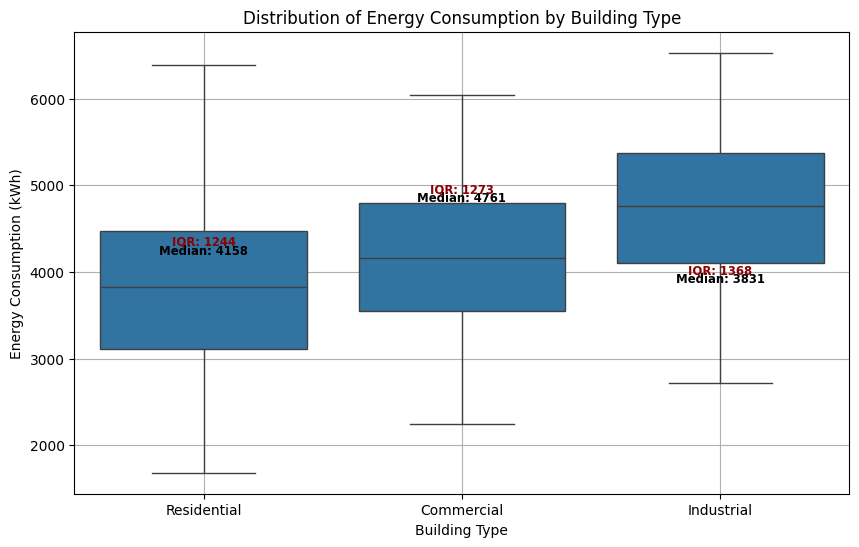

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Building_Type', y='Energy_Consumption', data=df)
plt.title('Distribution of Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)

# Add text labels for the median and IQR above each box
medians = df.groupby('Building_Type')['Energy_Consumption'].median().reset_index()
q1 = df.groupby('Building_Type')['Energy_Consumption'].quantile(0.25).reset_index()
q3 = df.groupby('Building_Type')['Energy_Consumption'].quantile(0.75).reset_index()

iqr = q3['Energy_Consumption'] - q1['Energy_Consumption']
iqr_df = pd.DataFrame({'Building_Type': q1['Building_Type'], 'IQR': iqr})

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    building_type = medians['Building_Type'][tick]
    median_val = medians['Energy_Consumption'][tick]
    iqr_val = iqr_df[iqr_df['Building_Type'] == building_type]['IQR'].iloc[0]

    # Add Median text
    ax.text(pos[tick], median_val + 50,
            f'Median: {median_val:.0f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

    # Add IQR text slightly above the median text
    ax.text(pos[tick], median_val + 150, # Adjust vertical position as needed
            f'IQR: {iqr_val:.0f}',
            horizontalalignment='center', size='small', color='darkred', weight='semibold')


plt.show()

**Answer for Q2:**

Using the box plot of Energy Consumption by Building Type, we could say that the commercial building type has the widest distribution of energy consumption because it has the largest box size among other building types and its IQR is 1273. The highest energy consumption according to the data is also the commercial buildings where its consumtion is 4761 kWh and the box plot shows that it has the highest median line and its upper whisker and outliers extend to significantly higher energy consumption values than those of other buildings.


**Q3:** How does the building size affect energy consumption?

**Visualization**

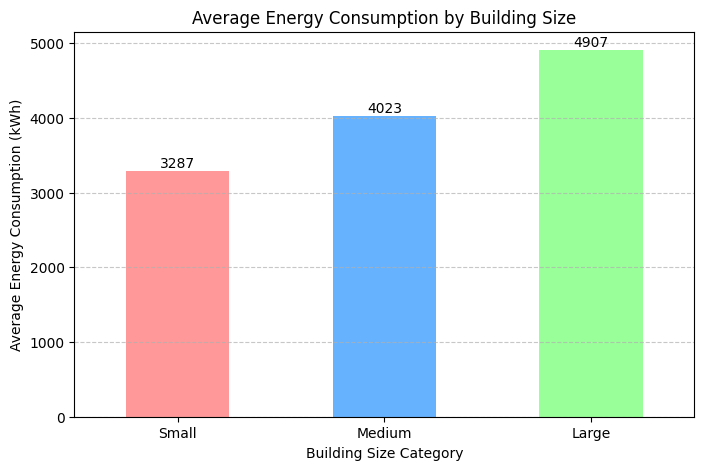

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is the cleaned DataFrame from previous steps
# Categorize SquareFootage into bins
bins = [0, 15000, 30000, float('inf')]
labels = ['Small', 'Medium', 'Large']
df['Size_Category'] = pd.cut(df['SquareFootage'], bins=bins, labels=labels)

# Calculate average energy consumption per size category
size_energy = df.groupby('Size_Category', observed=False)['Energy_Consumption'].mean()

plt.figure(figsize=(8, 5))
size_energy.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Average Energy Consumption by Building Size')
plt.xlabel('Building Size Category')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(size_energy):
    plt.text(i, v + 50, f'{v:.0f}', ha='center')
plt.show()

**Answer for Q3:**

**How the graph was generated:**

We started by sorting the buildings into friendly categories: Small, Medium, and Large based on their `SquareFootage`, using buckets or bins. Then, we grouped them into these size buckets and calculated theie average using the `Energy_Consumption` for each group.

So based on the graph presented it's revealed that there is a clear positive correlation between building size and  energy consumption where the large buildings have the most energy consumption, the smallar the buildings have the lowest  consumption, and medium buildings consume modarte amount of energy which is more than the small ones but less than the large ones. This means that the larger the building the more energy it would need.


**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

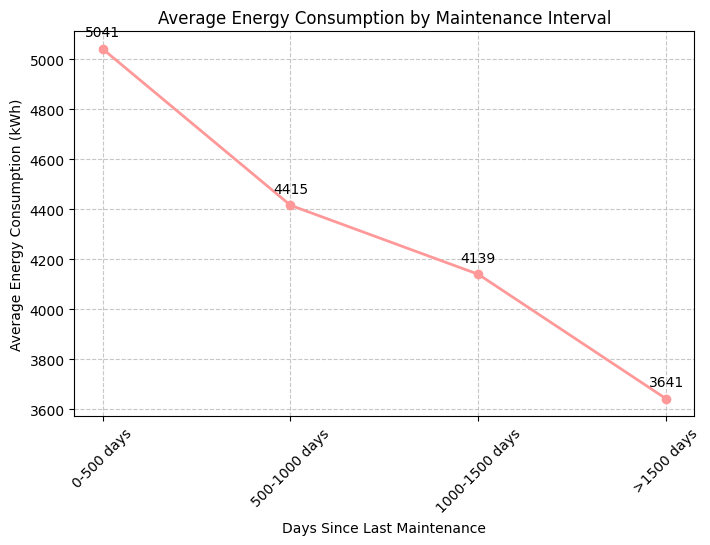

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is the cleaned DataFrame from previous steps
# Categorize Days_since_last_maintenance into bins
bins = [0, 500, 1000, 1500, float('inf')]
labels = ['0-500 days', '500-1000 days', '1000-1500 days', '>1500 days']
df['Maintenance_Interval'] = pd.cut(df['Days_since_last_maintenance'], bins=bins, labels=labels)

# Calculate average energy consumption per maintenance interval
maintenance_energy = df.groupby('Maintenance_Interval', observed=False)['Energy_Consumption'].mean()

plt.figure(figsize=(8, 5))
maintenance_energy.plot(kind='line', marker='o', color='#FF9999', linewidth=2)
plt.title('Average Energy Consumption by Maintenance Interval')
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Average Energy Consumption (kWh)')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(maintenance_energy):
    plt.text(i, v + 50, f'{v:.0f}', ha='center')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.show()

**Answer for Q4:**

No, as according to the graph presented the buildings tends to consume less energy with longer intervals since there last maintenance. As based on the graph provided above the building that maintained frequently consume significantly more energy where the average consumption steadily of the buildings that were maintained within the last 500 days dropped significantly from 5041 kWh in the to 3641 kWh when the maintenance interval was over 1500 days. This visualization indicates a clear inverse relationship between average energy consumption and days since the last maintenance.

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

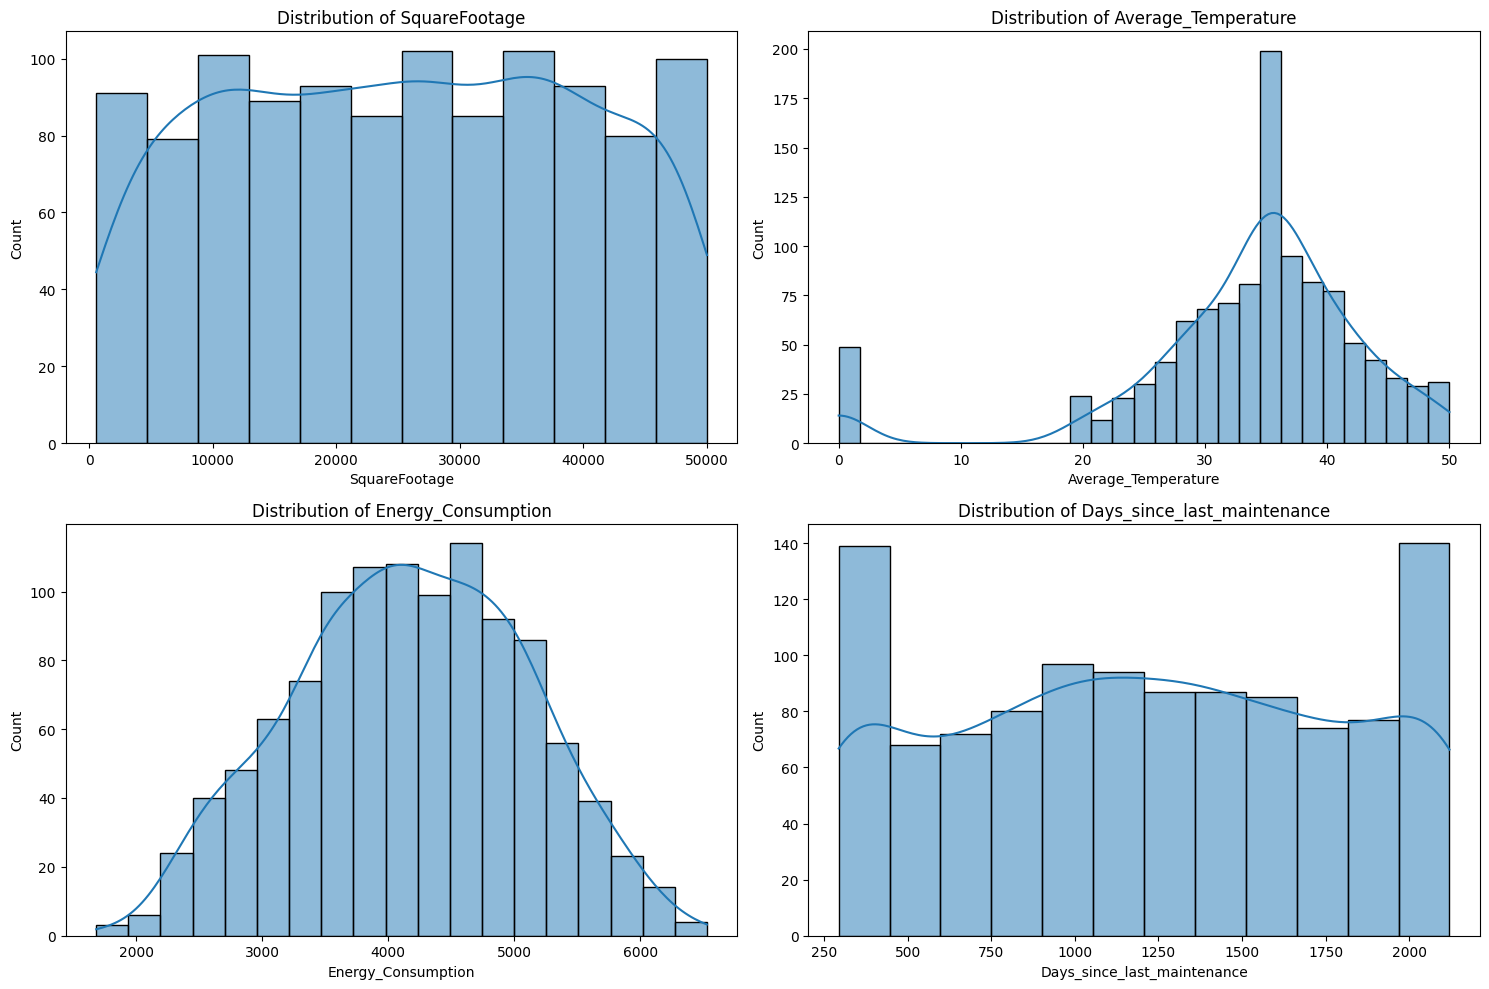

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption', 'Days_since_last_maintenance']
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Answer for Q5:**

The study of the histograms presented above in relation to the building energy metrics revealed that there are several key patterns where ***Square_Footage*** and ***Energy_Consumption*** showed clear right skewness, ***Average_Temperature*** is closer to a normal distribution, and ***Days_since_last_maintenance*** has a somewhat uniform or slightly right-skewed distribution.


**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

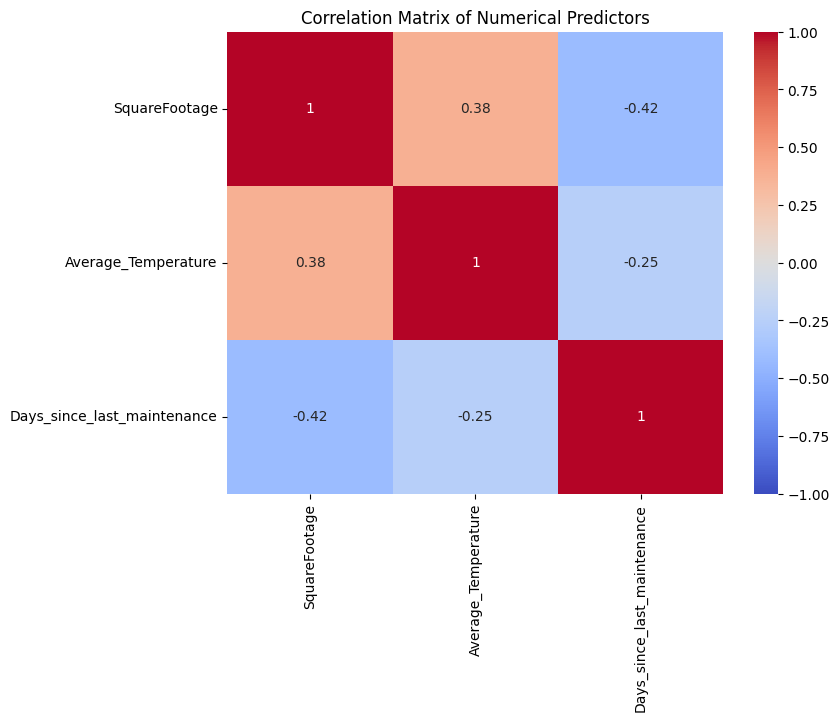

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the cleaned DataFrame from previous steps
# Select numerical predictors (excluding target if already modeled, but including for context)
predictors = ['SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance']
correlation_matrix = df[predictors].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Predictors')
plt.show()

**Answer for Q6:**

Multicollinearity is the strong linear relationship between two or more independant variables in a regression model. It causes problems because it makes coefficient estimates unstable and inflates standard errors which makes it difficult to determine the unique impact of each variable. Based on the provided correlation matrix, a severe multicollinearity problem doesn't exist as the highest absolute correlation is a moderate 0.57, which is below the threshold typically considered problematic as any number below 0.7 or 0.8 isn't considered problematic.



## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
# Select features and target variable
features = ['Building_Type', 'Governorate', 'Neighborhood', 'Occupancy_Level', 'Appliances_Usage_Level', 'SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance', 'Day_type']
target = 'Energy_Consumption'

df_model = df[features + [target]]

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df_model[features], drop_first=True)

# Combine encoded features with the target variable
df_encoded[target] = df_model[target]

print("DataFrame after one-hot encoding:")
display(df_encoded.head())

DataFrame after one-hot encoding:


,SquareFootage,Average_Temperature,Days_since_last_maintenance,Building_Type_Industrial,Building_Type_Residential,Building_Type_Unknown,Governorate_Cairo,Governorate_Giza,Governorate_Unknown,Neighborhood_gleem,...,Neighborhood_maadi,Neighborhood_mohandessin,Neighborhood_new cairo,Neighborhood_smouha,Occupancy_Level_Low,Occupancy_Level_Medium,Appliances_Usage_Level_Low,Appliances_Usage_Level_Medium,Day_type_weekend,Energy_Consumption
0,7063,28.61,2120,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,2713.95
1,44372,35.26,1335,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,5744.99
2,19255,37.88,1702,True,False,False,True,False,False,False,...,False,False,True,False,False,True,True,False,True,4101.24
3,13265,35.06,814,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,3009.14
4,13375,28.82,1166,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,3279.17


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (y)
X = df_encoded.drop('Energy_Consumption', axis=1)
y = df_encoded['Energy_Consumption']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Linear Regression model trained.")

Linear Regression model trained.


## Model Evaluation

Evaluate the model you applied.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 33938.68
Root Mean Squared Error (RMSE): 184.22
R-squared (R2): 0.96


## Conclusion and Recommendations

The analysis showed that while the model achieved an exceptionally strong performance R^2 = 0.96 with a low average error RMSE=184 kWh which suggests that it's highly effective at predicting energy use, there are crucial considerations for its deployment. Multicollinearity isn’t a big issue in this dataset where the highest correlation is only 0.57. The independent variables aren’t following a normal distribution and it’s a bit confusing that buildings with less maintenance seem to use less energy. This model could be considered a great starting point for an electricity company but we need to put it through its paces with some fresh unseen data to make sure it’s accurate . Plus, it should exclude those hidden factors like maintenance schedules and try out some non-linear tricks to really get a handle on the data’s complexities.




## Bouns

Remove the outliers


In [ ]:
# Identify numerical columns for outlier removal (excluding the target for now)
numerical_cols_outliers = ['SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance']

# Create a copy of the dataframe to remove outliers from
df_cleaned_outliers = df.copy()

# Remove outliers using IQR
for col in numerical_cols_outliers:
    Q1 = df_cleaned_outliers[col].quantile(0.25)
    Q3 = df_cleaned_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned_outliers = df_cleaned_outliers[(df_cleaned_outliers[col] >= lower_bound) & (df_cleaned_outliers[col] <= upper_bound)]

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_cleaned_outliers)}")

Original number of rows: 1100
Number of rows after outlier removal: 1100


Cleaned Data after removing the outliers

In [ ]:
# Ensure 'Day_type' is created in the df_cleaned_outliers DataFrame
df_cleaned_outliers['Day_type'] = df_cleaned_outliers['Day_of_Week'].apply(lambda x: 'weekend' if x in ['saturday', 'sunday'] else 'weekday' if x != 'unknown' else 'unknown')

# Select features and target variable from the dataframe without outliers
features = ['Building_Type', 'Governorate', 'Neighborhood', 'Occupancy_Level', 'Appliances_Usage_Level', 'SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance', 'Day_type']
target = 'Energy_Consumption'

df_model_cleaned = df_cleaned_outliers[features + [target]]

# Apply one-hot encoding to categorical features
df_encoded_cleaned = pd.get_dummies(df_model_cleaned[features], drop_first=True)

# Combine encoded features with the target variable
df_encoded_cleaned[target] = df_model_cleaned[target]

print("DataFrame after one-hot encoding (outliers removed):")
display(df_encoded_cleaned.head())

DataFrame after one-hot encoding (outliers removed):


,SquareFootage,Average_Temperature,Days_since_last_maintenance,Building_Type_Industrial,Building_Type_Residential,Governorate_Cairo,Governorate_Giza,Neighborhood__gleem,Neighborhood__heliopolis,Neighborhood__maadi,...,Neighborhood_mohandessin,Neighborhood_mohandessin_,Neighborhood_new cairo,Neighborhood_smouha,Neighborhood_smouha_,Occupancy_Level_Low,Occupancy_Level_Medium,Appliances_Usage_Level_Low,Appliances_Usage_Level_Medium,Energy_Consumption
0,7063,28.61,2120,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,2713.95
1,44372,35.60,1335,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,5744.99
2,19255,37.88,1702,True,False,True,False,False,False,False,...,False,False,True,False,False,False,True,True,False,4101.24
3,13265,35.06,814,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,3009.14
4,13375,28.82,1166,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,3279.17


Apply the new Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features (X_cleaned) and target (y_cleaned) for the data without outliers
X_cleaned = df_encoded_cleaned.drop('Energy_Consumption', axis=1)
y_cleaned = df_encoded_cleaned['Energy_Consumption']

# Split data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize and train a new Linear Regression model on the data without outliers
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

print("Linear Regression model trained on data without outliers.")

Linear Regression model trained on data without outliers.


Evaluate the Linear Regression model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set (without outliers)
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Evaluate the new model
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
rmse_cleaned = np.sqrt(mse_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print(f"Performance of the model trained on data without outliers:")
print(f"Mean Squared Error (MSE): {mse_cleaned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cleaned:.2f}")
print(f"R-squared (R2): {r2_cleaned:.2f}")

Performance of the model trained on data without outliers:
Mean Squared Error (MSE): 48263.07
Root Mean Squared Error (RMSE): 219.69
R-squared (R2): 0.94


## Comparing the Models:

We are comparing the linear regression models where one model contained outliers and the other model we excluded the outliers and the results were shocking. Where the model with all the data actually did a slightly better job at explaining energy use with an R-squared of ***(r2:0.96)*** compared to ***(r2_cleaned:0.94)*** for the outlier-free version. Also the errors actually went up a bit when we removed the outliers where the Mean Squared Error jumped from ***(mse:33938.68)*** to ***(mse_cleaned:48263.07)*** and the Root Mean Squared Error went from ***(rmse:184.22)*** to ***(rmse_cleaned:219.69)***. So, the cleaner model ended up making slightly bigger mistakes or errors.